In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as stats
from sklearn.metrics import confusion_matrix,classification_report,precision_score,f1_score,recall_score,roc_auc_score,accuracy_score
from sklearn.metrics import plot_roc_curve
from warnings import filterwarnings
filterwarnings('ignore')

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, recall_score, classification_report 

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from xgboost import XGBClassifier

In [66]:
df = pd.read_csv('clean_data.csv')
df.head()

,retained,created,firstorder,lastorder,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city,eopen,tenure,recency
0,0,2012-09-28,2013-11-08,2013-11-08,29,100.000000,3.448276,14.52,0.000000,0,0,0,Monday,DEL,29,1.112329,5.065753
1,1,2010-12-19,2011-01-04,2014-01-19,95,92.631579,10.526316,83.69,0.181641,1,1,1,Friday,DEL,89,3.087671,4.868493
2,0,2010-10-22,2011-03-28,2011-03-28,0,0.000000,0.000000,54.96,0.000000,0,0,0,Thursday,BOM,0,0.430137,7.684932
3,1,2010-11-27,2010-11-29,2013-01-28,30,90.000000,13.333333,111.91,0.008850,0,0,0,Monday,BOM,27,2.172603,5.843836
4,1,2008-11-17,2010-12-10,2014-01-14,46,80.434783,15.217391,175.10,0.141176,1,1,0,Wednesday,DEL,38,5.161644,4.882192


In [67]:
df.dtypes

retained        int64
created        object
firstorder     object
lastorder      object
esent           int64
eopenrate     float64
eclickrate    float64
avgorder      float64
ordfreq       float64
paperless       int64
refill          int64
doorstep        int64
favday         object
city           object
eopen           int64
tenure        float64
recency       float64
dtype: object

In [68]:
df['created'] = df['created'].apply(lambda x: pd.to_datetime(str(x)))
df['firstorder'] = df['firstorder'].apply(lambda x: pd.to_datetime(str(x)))
df['lastorder'] = df['lastorder'].apply(lambda x: pd.to_datetime(str(x)))

In [69]:
df.dtypes

retained               int64
created       datetime64[ns]
firstorder    datetime64[ns]
lastorder     datetime64[ns]
esent                  int64
eopenrate            float64
eclickrate           float64
avgorder             float64
ordfreq              float64
paperless              int64
refill                 int64
doorstep               int64
favday                object
city                  object
eopen                  int64
tenure               float64
recency              float64
dtype: object

In [70]:
# As per the statistical tests conducted, avgorder and tenure variables are not significant.
# So we can ignore the variables. From vif values, we can see that eopenrate can be dropeed
cat_cols = ['paperless','refill','doorstep','favday','city']
num_cols = ['esent','eopen','eclickrate','ordfreq','recency']

In [220]:
cat_cols1 = ['paperless','refill','doorstep','favday','city']
num_cols2 = ['esent','eopen','eclickrate','ordfreq','recency','avgorder','tenure','eopenrate']

In [71]:
df1 = df.copy()

In [72]:
favday_df = pd.get_dummies(df1[['favday','city']],drop_first=True)
favday_df.head()

,favday_Monday,favday_Saturday,favday_Sunday,favday_Thursday,favday_Tuesday,favday_Wednesday,city_BOM,city_DEL,city_MAA
0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,1,0


In [73]:
df1 = pd.concat([df1[num_cols],favday_df,df1[['paperless','refill','doorstep','retained']]],axis=1)
df1.head()

,esent,eopen,eclickrate,ordfreq,recency,favday_Monday,favday_Saturday,favday_Sunday,favday_Thursday,favday_Tuesday,favday_Wednesday,city_BOM,city_DEL,city_MAA,paperless,refill,doorstep,retained
0,29,29,3.448276,0.000000,5.065753,1,0,0,0,0,0,0,1,0,0,0,0,0
1,95,89,10.526316,0.181641,4.868493,0,0,0,0,0,0,0,1,0,1,1,1,1
2,0,0,0.000000,0.000000,7.684932,0,0,0,1,0,0,1,0,0,0,0,0,0
3,30,27,13.333333,0.008850,5.843836,1,0,0,0,0,0,1,0,0,0,0,0,1
4,46,38,15.217391,0.141176,4.882192,0,0,0,0,0,1,0,1,0,1,1,0,1


In [74]:
sc = StandardScaler()
df = sc.fit_transform(df1[num_cols])
df = pd.DataFrame(df,columns=num_cols)
df.head()

,esent,eopen,eclickrate,ordfreq,recency
0,0.070237,2.547955,-0.214185,-0.305422,0.168536
1,4.020476,9.443172,0.457053,1.526047,0.062912
2,-1.665474,-0.784734,-0.541198,-0.305422,1.570994
3,0.130089,2.318114,0.723254,-0.216193,0.585166
4,1.087723,3.582237,0.901926,1.118050,0.070247


In [75]:
df_new = pd.concat([df[num_cols],favday_df,df1[['paperless','refill','doorstep','retained']]],axis=1)
df_new.head()

,esent,eopen,eclickrate,ordfreq,recency,favday_Monday,favday_Saturday,favday_Sunday,favday_Thursday,favday_Tuesday,favday_Wednesday,city_BOM,city_DEL,city_MAA,paperless,refill,doorstep,retained
0,0.070237,2.547955,-0.214185,-0.305422,0.168536,1,0,0,0,0,0,0,1,0,0,0,0,0
1,4.020476,9.443172,0.457053,1.526047,0.062912,0,0,0,0,0,0,0,1,0,1,1,1,1
2,-1.665474,-0.784734,-0.541198,-0.305422,1.570994,0,0,0,1,0,0,1,0,0,0,0,0,0
3,0.130089,2.318114,0.723254,-0.216193,0.585166,1,0,0,0,0,0,1,0,0,0,0,0,1
4,1.087723,3.582237,0.901926,1.118050,0.070247,0,0,0,0,0,1,0,1,0,1,1,0,1


In [76]:
X = df1.drop('retained',axis=1)
y=df1['retained']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.3)

In [124]:
# With scaled variables

In [186]:
score_card = pd.DataFrame(columns=['Model','Precision Score','Recall Score','Accuracy Score','f1-score','AUC Score'])

def scores(model_name,y_test,y_pred):
    precision = round(precision_score(y_test,y_pred),2)
    recall    = round(recall_score(y_test,y_pred),2)
    accuracy  = round(accuracy_score(y_test,y_pred),2)   
    f1        = round(f1_score(y_test,y_pred),2)
    auc       = round(roc_auc_score(y_test, y_pred),4)
    global score_card
    score_card = score_card.append({'Model' : model_name,                              
                                    'Precision Score': precision_score(y_test, y_pred),
                                    'Recall Score': recall_score(y_test, y_pred),
                                    'Accuracy Score': accuracy_score(y_test, y_pred),
                                    'f1-score': f1_score(y_test, y_pred),
                                    'AUC Score' : roc_auc_score(y_test, y_pred)
                                    },ignore_index = True)
    return score_card.sort_values(by='f1-score',ascending= False).reset_index(drop=True)
    
# Logistic Regression
def log_reg(X_train,X_test, y_train,y_test):
    lr = LogisticRegression(random_state=10)
    lr = lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    name = 'Logistic Regression'
    log_score = scores(name,y_test,pred)
    train_pred = lr.predict(X_train)
    return log_score

# KNN Classifier
# def knn(X_train,X_test, y_train,y_test):
#     neigh = KNeighborsClassifier()
#     neigh = neigh.fit(X_train, y_train)
#     pred = neigh.predict(X_test)
#     name = 'KNN'
#     knn_score = scores(name,y_test,pred)
#     return knn_score

# Decision Tree Classifier
def dtree(X_train,X_test, y_train,y_test):
    decision_tree = DecisionTreeClassifier(random_state=10)
    dt_model = decision_tree.fit(X_train,y_train)
    pred = dt_model.predict(X_test)
    name = 'Decision Tree'
    dt_score = scores(name,y_test,pred)
    return dt_score

#Random Forest Classifier
def random(X_train,X_test, y_train,y_test):
    rf = RandomForestClassifier(random_state=10)
    rf_model = rf.fit(X_train,y_train)
    pred = rf_model.predict(X_test)
    name = 'Random Forest'
    rf_score = scores(name,y_test,pred)
    return rf_score

#Ada Boost Classifier
def ada(X_train,X_test, y_train,y_test):
    ad = AdaBoostClassifier(random_state=10)
    ad_model = ad.fit(X_train,y_train)
    pred = ad_model.predict(X_test)
    name = 'Ada Boost'
    ad_score = scores(name,y_test,pred)
    return ad_score

#Gradient Boosting Classifier
def gboost(X_train,X_test, y_train,y_test):
    gb = GradientBoostingClassifier(random_state=10)
    gb_model = gb.fit(X_train,y_train)
    pred = gb_model.predict(X_test)
    name = 'Gradient Boosting'
    gb_score = scores(name,y_test,pred)
    return gb_score

#Gaussian NB
def gnb(X_train,X_test, y_train,y_test):
    nb = GaussianNB()
    nb_model = nb.fit(X_train,y_train)
    pred = nb_model.predict(X_test)
    name = 'Gaussian NB'
    nb_score = scores(name,y_test,pred)
    return nb_score

#Bagging Classifier
def bag(X_train,X_test, y_train,y_test):
    bg = BaggingClassifier(random_state=10)
    bg_model = bg.fit(X_train,y_train)
    pred = bg_model.predict(X_test)
    name = 'Bagging Classifier'
    bg_score = scores(name,y_test,pred)
    return bg_score

#Stacking Classifier
#def stack(X_train,X_test, y_train,y_test):
    #st = StackingClassifier()
    #st_model = st.fit(X_train,y_train)
    #pred = st_model.predict(X_test)
    #name = 'Stacking Classifier'
    #st_score = scores(name,y_test,pred)
    #return st_score

#Extreme Gradient Boost Classifier
def xgb(X_train,X_test, y_train,y_test):
    xg = XGBClassifier(random_state=10)
    xg_model = xg.fit(X_train,y_train)
    pred = xg_model.predict(X_test)
    name = 'Extreme Gradient Boost Classifier'
    xg_score = scores(name,y_test,pred)
    return xg_score
    
conf_mat = pd.DataFrame(columns=['Model','Precision','Sensitivity','Correct_classfication','Misclassfication'])
    
def plot_confusion_matrix(model,name,X_train,X_test, y_train,y_test):
    mod = model.fit(X_train, y_train)
    y_pred = mod.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
        
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'PiYG', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()
    
    TN = cm[0,0]
    TP = cm[1,1]
    FP = cm[0,1]
    FN = cm[1,0]
    precision = TP/(TP+FP)
    sensitivity = TP/(TP+FN)
    correct_classfication = ((TN+TP)/(TP+TN+FP+FN))*100
    misclassfication = ((FN+FP)/(TP+TN+FP+FN))*100
    global conf_mat
    conf_mat = conf_mat.append({'Model' : name,                              
                                    'Precision': precision,
                                    'Sensitivity': sensitivity,
                                    'Correct_classfication': correct_classfication,
                                    'Misclassfication': misclassfication,
                                    },ignore_index = True)
    return conf_mat

def get_train_report(model,X_train,y_train):
    train_pred = model.predict(X_train)
    return f'\nTrain report : \n {classification_report(y_train, train_pred)}'

def get_test_report(model,X_test,y_test):
    test_pred = model.predict(X_test)
    return f'\nTest report : \n {classification_report(y_test, test_pred)}'

In [187]:
df_new.columns

Index(['esent', 'eopen', 'eclickrate', 'ordfreq', 'recency', 'favday_Monday',
       'favday_Saturday', 'favday_Sunday', 'favday_Thursday', 'favday_Tuesday',
       'favday_Wednesday', 'city_BOM', 'city_DEL', 'city_MAA', 'paperless',
       'refill', 'doorstep', 'retained'],
      dtype='object')

In [188]:
X = df_new.drop(['retained'],axis=1)
y=df_new['retained']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.3)

In [189]:
ada(X_train, X_test, y_train, y_test)

,Model,Precision Score,Recall Score,Accuracy Score,f1-score,AUC Score
0,Ada Boost,0.96048,0.987823,0.957819,0.97396,0.91335


In [190]:
dtree(X_train, X_test, y_train, y_test)

,Model,Precision Score,Recall Score,Accuracy Score,f1-score,AUC Score
0,Ada Boost,0.960480,0.987823,0.957819,0.973960,0.913350
1,Decision Tree,0.968904,0.969064,0.950460,0.968984,0.922888


In [191]:
print('Decision Tree :\n')
print(get_train_report(DT,X_train,y_train))
print(get_test_report(DT,X_test,y_test))
print('*'*85)


print('Ada Boost :\n')
print(get_train_report(AB,X_train,y_train))
print(get_test_report(AB,X_test,y_test))
print('*'*85)

Decision Tree :


Train report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       1.00      1.00      1.00     14180

    accuracy                           1.00     17755
   macro avg       1.00      1.00      1.00     17755
weighted avg       1.00      1.00      1.00     17755


Test report : 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      1533
           1       0.97      0.97      0.97      6077

    accuracy                           0.95      7610
   macro avg       0.92      0.93      0.92      7610
weighted avg       0.95      0.95      0.95      7610

*************************************************************************************
Ada Boost :


Train report : 
               precision    recall  f1-score   support

           0       0.95      0.85      0.90      3575
           1       0.96      0.99      0.98     14180

    accuracy 

## Decision tree tuning

In [192]:
score_card = pd.DataFrame(columns=['Model','Precision Score','Recall Score','Accuracy Score','f1-score','AUC Score'])

def scores(model_name,y_test,y_pred):
    precision = round(precision_score(y_test,y_pred),2)
    recall    = round(recall_score(y_test,y_pred),2)
    accuracy  = round(accuracy_score(y_test,y_pred),2)   
    f1        = round(f1_score(y_test,y_pred),2)
    auc       = round(roc_auc_score(y_test, y_pred),4)
    global score_card
    score_card = score_card.append({'Model' : model_name,                              
                                    'Precision Score': precision_score(y_test, y_pred),
                                    'Recall Score': recall_score(y_test, y_pred),
                                    'Accuracy Score': accuracy_score(y_test, y_pred),
                                    'f1-score': f1_score(y_test, y_pred),
                                    'AUC Score' : roc_auc_score(y_test, y_pred)
                                    },ignore_index = True)
    return score_card.sort_values(by='f1-score',ascending= False).reset_index(drop=True)

def dtree_tune(X_train,X_test, y_train,y_test):
    decision_tree = DecisionTreeClassifier(criterion = tree_grid_model.best_params_['criterion'],
                                 max_depth = tree_grid_model.best_params_['max_depth'],
                                 max_features = tree_grid_model.best_params_['max_features'],
                                 min_samples_split = tree_grid_model.best_params_['min_samples_split'],random_state=10)
    dt_model = decision_tree.fit(X_train,y_train)
    pred = dt_model.predict(X_test)
    name = 'Decision Tree'
    dt_score = scores(name,y_test,pred)
    return dt_score

def bag_dtree(X_train,X_test, y_train,y_test):
    bg = BaggingClassifier(random_state=10)
    bg_model = bg.fit(X_train,y_train)
    pred = bg_model.predict(X_test)
    name = 'Bagging Classifier'
    bg_score = scores(name,y_test,pred)
    return bg_score

def get_train_report(model):

    train_pred = model.predict(X_train)

    return(classification_report(y_train, train_pred))

def get_test_report(model):
    
    test_pred = model.predict(X_test)

    return(classification_report(y_test, test_pred))

### Decision Tree

In [193]:

tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'max_features': range(2,10),
                     'min_samples_split': range(2,10)}]

dt_classification = DecisionTreeClassifier(random_state = 42)

tree_grid = GridSearchCV(estimator =dt_classification ,param_grid =tuned_paramaters,cv =5 )

tree_grid_model = tree_grid.fit(X_train,y_train)

print('Best parameters for Desicion Tree Classifier : ',tree_grid_model.best_params_)

Best parameters for Desicion Tree Classifier :  {'criterion': 'gini', 'max_depth': 8, 'max_features': 9, 'min_samples_split': 2}


In [194]:
decision_tree = DecisionTreeClassifier(criterion = tree_grid_model.best_params_['criterion'],
                                 max_depth = tree_grid_model.best_params_['max_depth'],
                                 max_features = tree_grid_model.best_params_['max_features'],
                                 min_samples_split = tree_grid_model.best_params_['min_samples_split'],random_state=10)
dt_model = decision_tree.fit(X_train,y_train)
pred = dt_model.predict(X_test)
name = 'Decision Tree'
dt_score = scores(name,y_test,pred)
dt_score

,Model,Precision Score,Recall Score,Accuracy Score,f1-score,AUC Score
0,Decision Tree,0.967846,0.985684,0.962418,0.976684,0.927936


In [195]:
# dtree_tune(X_train,X_test, y_train,y_test)

### Bagged Decision Tree

In [196]:
tuned_paramaters = [{'n_estimators': [10,20,50,80,90,100],
                     'max_features': range(2,10)}]

bag_dt= BaggingClassifier(base_estimator=dt_model, random_state = 42)

bag_tree_grid = GridSearchCV(estimator =bag_dt ,param_grid =tuned_paramaters,cv =5 )

bag_tree_grid_model = bag_tree_grid.fit(X_train,y_train)

print('Best parameters for Desicion Tree Classifier : ',bag_tree_grid_model.best_params_)

Best parameters for Desicion Tree Classifier :  {'max_features': 9, 'n_estimators': 10}


In [197]:
bag_tree = BaggingClassifier(n_estimators = bag_tree_grid_model.best_params_['n_estimators'],
                                 max_features = bag_tree_grid_model.best_params_['max_features']
                                ,random_state=10)
bag_dt_model = bag_tree.fit(X_train,y_train)
pred = bag_dt_model.predict(X_test)
name = 'Bagged Decision Tree'
dt_score = scores(name,y_test,pred)
dt_score

,Model,Precision Score,Recall Score,Accuracy Score,f1-score,AUC Score
0,Decision Tree,0.967846,0.985684,0.962418,0.976684,0.927936
1,Bagged Decision Tree,0.958778,0.991279,0.959001,0.974757,0.911164


### Adaboost Decision tree

In [198]:
tuned_paramaters = [{'n_estimators' : [100, 120, 150, 200, 250, 300, 350],
                     'learning_rate' : [0.1, 0.01, 0.001, 0.15, 0.015]}]

ada_dt= AdaBoostClassifier(base_estimator=dt_model, random_state = 42)

ada_tree_grid = GridSearchCV(estimator =ada_dt  ,param_grid =tuned_paramaters,cv =5 )

ada_tree_grid_model = ada_tree_grid.fit(X_train,y_train)

print('Best parameters for Desicion Tree Classifier : ',ada_tree_grid_model.best_params_)

Best parameters for Desicion Tree Classifier :  {'learning_rate': 0.015, 'n_estimators': 150}


In [199]:
ada_tree = AdaBoostClassifier(n_estimators = ada_tree_grid_model.best_params_['n_estimators'],
                                 learning_rate = ada_tree_grid_model.best_params_['learning_rate']
                                ,random_state=10)
ada_dt_model = ada_tree.fit(X_train,y_train)
pred = ada_dt_model.predict(X_test)
name = 'Adaboost Decision Tree'
dt_score = scores(name,y_test,pred)
dt_score

,Model,Precision Score,Recall Score,Accuracy Score,f1-score,AUC Score
0,Decision Tree,0.967846,0.985684,0.962418,0.976684,0.927936
1,Bagged Decision Tree,0.958778,0.991279,0.959001,0.974757,0.911164
2,Adaboost Decision Tree,0.938283,0.998190,0.946124,0.967310,0.868958


In [200]:
print('Decision tree')
print(get_train_report(dt_model))
print(get_test_report(dt_model))
print('*'*85)

print('Bagged Decision tree')
print(get_train_report(bag_dt_model))
print(get_test_report(bag_dt_model))
print('*'*85)

print('Adaboost Decision tree')
print(get_train_report(ada_dt_model))
print(get_test_report(ada_dt_model))
print('*'*85)

Decision tree
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      3575
           1       0.97      0.99      0.98     14180

    accuracy                           0.97     17755
   macro avg       0.96      0.94      0.95     17755
weighted avg       0.97      0.97      0.97     17755

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      1533
           1       0.97      0.99      0.98      6077

    accuracy                           0.96      7610
   macro avg       0.95      0.93      0.94      7610
weighted avg       0.96      0.96      0.96      7610

*************************************************************************************
Bagged Decision tree
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      3575
           1       0.99      1.00      1.00     14180

    accuracy                           0.99     17755
   macr

### AdaBoost

In [201]:
tuned_paramaters = [{'n_estimators' : [100, 120, 150, 200, 250, 300, 350],
                     'learning_rate' : [0.1, 0.01, 0.001, 0.15, 0.015]}]

ada_class= AdaBoostClassifier(random_state = 42)

ada_grid = GridSearchCV(estimator =ada_class  ,param_grid =tuned_paramaters,cv =5 )

ada_grid_model = ada_grid.fit(X_train,y_train)

print('Best parameters for Desicion Tree Classifier : ',ada_grid_model.best_params_)

Best parameters for Desicion Tree Classifier :  {'learning_rate': 0.15, 'n_estimators': 350}


In [202]:
ada = AdaBoostClassifier(n_estimators = ada_tree_grid_model.best_params_['n_estimators'],
                                 learning_rate = ada_tree_grid_model.best_params_['learning_rate']
                                ,random_state=10)
ada_model = ada.fit(X_train,y_train)
pred = ada_model.predict(X_test)
name = 'Adaboost '
dt_score = scores(name,y_test,pred)
dt_score

,Model,Precision Score,Recall Score,Accuracy Score,f1-score,AUC Score
0,Decision Tree,0.967846,0.985684,0.962418,0.976684,0.927936
1,Bagged Decision Tree,0.958778,0.991279,0.959001,0.974757,0.911164
2,Adaboost Decision Tree,0.938283,0.998190,0.946124,0.967310,0.868958
3,Adaboost,0.938283,0.998190,0.946124,0.967310,0.868958


In [212]:
print('Adaboost ')
print(get_train_report(ada_model))
print(get_test_report(ada_model))
print('*'*85)

Adaboost 
              precision    recall  f1-score   support

           0       0.99      0.73      0.84      3575
           1       0.94      1.00      0.97     14180

    accuracy                           0.94     17755
   macro avg       0.96      0.87      0.90     17755
weighted avg       0.95      0.94      0.94     17755

              precision    recall  f1-score   support

           0       0.99      0.74      0.85      1533
           1       0.94      1.00      0.97      6077

    accuracy                           0.95      7610
   macro avg       0.96      0.87      0.91      7610
weighted avg       0.95      0.95      0.94      7610

*************************************************************************************


In [216]:
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)

    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', cbar = False, linewidths = 0.1, annot_kws = {'size':25})

    plt.xticks(fontsize = 20)

    plt.yticks(fontsize = 20)

    plt.show()
    TN = cm[0,0]
    TP = cm[1,1]
    FP = cm[0,1]
    FN = cm[1,0]
      
    correct_classified= (TP+TN)/(TN+TP+FP+FN)*100
    misclassified=(FP+FN)/(TN+TP+FP+FN)*100
    precision = TP/(TP+FP)
    recall = TP/(FN+TP)
    specificity = TN/(TN+FP)
    f1score = 2*((precision*recall)/(precision+recall))
    
    
    print('TN =',TN)
    print('TP =',TP)
    print('FP =',FP)
    print('FN =',FN)
    print('misclassified',misclassified)
    print('correct_classified',correct_classified)
    print('precision',precision)
    print('recall/Sensitivity/TPR : ',recall)
    print('f1score',f1score)
    print('specificity/TNR :',specificity)

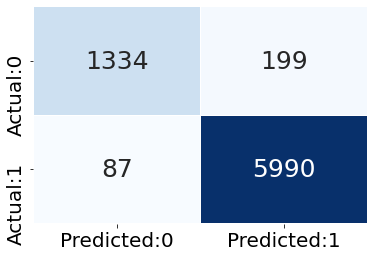

TN = 1334
TP = 5990
FP = 199
FN = 87
misclassified 3.7582128777923787
correct_classified 96.24178712220763
precision 0.9678461787041526
recall/Sensitivity/TPR :  0.9856837255224618
f1score 0.9766835154084461
specificity/TNR : 0.8701891715590345


In [217]:
plot_confusion_matrix(dt_model)

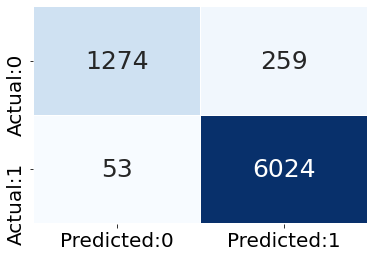

TN = 1274
TP = 6024
FP = 259
FN = 53
misclassified 4.099868593955322
correct_classified 95.90013140604468
precision 0.9587776539869489
recall/Sensitivity/TPR :  0.9912785914102353
f1score 0.974757281553398
specificity/TNR : 0.8310502283105022


In [218]:
plot_confusion_matrix(bag_dt_model)

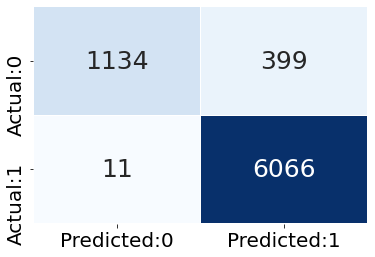

TN = 1134
TP = 6066
FP = 399
FN = 11
misclassified 5.387647831800263
correct_classified 94.61235216819975
precision 0.9382830626450116
recall/Sensitivity/TPR :  0.9981898963304262
f1score 0.9673098389411577
specificity/TNR : 0.7397260273972602


In [219]:
plot_confusion_matrix(ada_dt_model)